# FraudGuard ML

## Project Overview
FraudGuard ML is an innovative, machine learning-driven project designed to detect and deter fraudulent credit card transactions. In an era where online transactions are increasingly becoming the norm, maintaining transactional integrity and security is paramount. FraudGuard ML contributes to this security by leveraging the power of machine learning to identify potentially fraudulent transactions.

Utilizing Python, a popular language in the data science realm due to its simplicity and powerful libraries, this project combines several machine learning techniques using libraries such as Scikit-learn. Flask, a lightweight and versatile web framework in Python, is used to create an API for model deployment.

The system is trained on a rich dataset consisting of both fraudulent and non-fraudulent transactions. The dataset provides the foundation for the learning model, as it captures crucial transaction characteristics, trends, and patterns that can potentially signal a fraudulent transaction.

The application offers a blend of data analytics and predictive modeling techniques to not just identify but also to learn and adapt to evolving transaction patterns. This ensures the system stays effective and up-to-date in the ever-changing landscape of online transactions.

## Project Steps

### Step 1: Data Acquisition and Understanding
The foundation of this project is a comprehensive dataset of credit card transactions. Our goal in this step is to find a dataset that includes both fraudulent and non-fraudulent transactions. Once the data is obtained, understanding the variables and their meanings is crucial for the subsequent analysis.

### Step 2: Exploratory Data Analysis (EDA) and Preprocessing
We begin by analyzing the dataset using various EDA techniques to understand the data's structure, characteristics, and hidden patterns. This phase includes cleaning the data, managing missing values and outliers, and addressing class imbalance issues commonly found in fraud detection scenarios.

### Step 3: Flask API Structure
Simultaneously, we start setting up the basic structure of the Flask API. This step involves creating the necessary endpoints that will interact with our machine learning model. Although the model isn't ready yet, setting up the API structure early on paves the way for smooth integration later.

### Step 4: Feature Selection and Engineering
Once the data is preprocessed, we move on to the feature selection and engineering stage. This involves determining which variables or features are most relevant to our machine learning model. New features can also be created from existing ones to improve the model's performance.

### Step 5: Model Building and Evaluation
With the relevant features identified, we start building the machine learning model. This process involves training the model on our dataset and tuning it to best capture the patterns within the data. Subsequently, we evaluate the model using various metrics to ensure its accuracy and reliability in identifying fraudulent transactions.

### Step 6: Flask API and Model Integration
Upon successful model training and evaluation, we integrate the model with our previously set up Flask API. This allows the model to receive input data through the API, process it, and return predictions indicating whether a given transaction is likely to be fraudulent.

### Step 7: Testing and Documentation
This final phase involves rigorous testing of all parts of the project. From the machine learning model's prediction accuracy to the Flask API's performance, all components are put through thorough testing to ensure they work as expected. The project's documentation is completed in this step, detailing the methods, findings, and functionality of the system for transparency and replicability.

### Step 1: Data Acquisition and Understanding

In [1]:
# Importing libraries
# EPreprocessing/EDA
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Resample 
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# Pipeline
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Fine Tune
from sklearn.model_selection import RandomizedSearchCV

# Metrics
from sklearn.metrics import f1_score, recall_score
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

import warnings

In [2]:
# Shows all the columns
pd.set_option('display.max_columns',None)

# Set the float values to decimal points
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [5]:
# Read in the fraudTrainlarge.csv file into a Pandas DataFrame
transaction_fraud_data = pd.read_csv(
    Path('./Resources/creditcard3.csv')
)

# Review DataFrame
display(transaction_fraud_data.head())
print('--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
display(transaction_fraud_data.tail())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,0.09,-0.55,-0.62,-0.99,-0.31,1.47,-0.47,0.21,0.03,0.40,0.25,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,-0.17,1.61,1.07,0.49,-0.14,0.64,0.46,-0.11,-0.18,-0.15,-0.07,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,0.21,0.62,0.07,0.72,-0.17,2.35,-2.89,1.11,-0.12,-2.26,0.52,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,-0.05,-0.23,0.18,0.51,-0.29,-0.63,-1.06,-0.68,1.97,-1.23,-0.21,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,0.75,-0.82,0.54,1.35,-1.12,0.18,-0.45,-0.24,-0.04,0.80,0.41,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
179548,124130.00,2.12,-0.09,-1.78,0.09,0.54,-0.48,0.13,-0.20,0.73,0.02,-1.41,-0.31,-0.45,0.57,0.96,-0.01,-0.69,0.19,-0.02,-0.24,0.19,0.66,-0.04,0.04,0.34,-0.09,-0.03,-0.06,3.00,0
179549,124130.00,-0.71,0.46,0.20,-0.42,1.19,-1.34,0.83,-0.16,0.08,-1.70,-0.59,0.08,0.05,-1.70,-0.47,-0.11,1.17,0.16,0.00,0.12,-0.10,-0.29,-0.04,-0.16,-0.16,-0.12,0.12,0.20,34.66,0
179550,124130.00,2.04,-0.06,-1.16,0.22,0.13,-0.69,0.12,-0.21,0.20,0.22,0.79,1.40,0.75,0.31,-0.72,0.15,-0.70,-0.36,0.55,-0.16,-0.25,-0.59,0.28,-0.32,-0.26,0.20,-0.07,-0.07,1.98,0
179551,124131.00,1.83,-0.08,-2.25,1.18,0.83,-0.86,0.95,-0.46,-0.15,0.31,-1.06,0.00,-0.06,0.82,0.27,-0.28,-0.57,-0.25,-0.30,0.03,0.18,0.28,-0.14,0.48,0.48,-0.52,-0.06,-0.04,144.00,0
179552,124131.00,-1.00,-0.13,2.07,-2.47,-0.13,-0.10,-0.16,0.15,-1.02,-0.28,-0.64,-0.23,1.78,-0.98,0.37,1.81,-0.51,-1.02,-0.40,0.50,0.27,0.59,-0.19,0.63,0.55,-0.26,0.26,0.14,50.35,0


In [6]:
# Check DataFrame data information
display(transaction_fraud_data.info())
print('Duplicates:')
display(transaction_fraud_data.duplicated().sum())
print('Null Values:')
display(transaction_fraud_data.isnull().sum())
print('Shape')
display(transaction_fraud_data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179553 entries, 0 to 179552
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    179553 non-null  float64
 1   V1      179553 non-null  float64
 2   V2      179553 non-null  float64
 3   V3      179553 non-null  float64
 4   V4      179553 non-null  float64
 5   V5      179553 non-null  float64
 6   V6      179553 non-null  float64
 7   V7      179553 non-null  float64
 8   V8      179553 non-null  float64
 9   V9      179553 non-null  float64
 10  V10     179553 non-null  float64
 11  V11     179553 non-null  float64
 12  V12     179553 non-null  float64
 13  V13     179553 non-null  float64
 14  V14     179553 non-null  float64
 15  V15     179553 non-null  float64
 16  V16     179553 non-null  float64
 17  V17     179553 non-null  float64
 18  V18     179553 non-null  float64
 19  V19     179553 non-null  float64
 20  V20     179553 non-null  float64
 21  V21     17

None

Duplicates:


669

Null Values:


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Shape


(179553, 31)

In [7]:
# Calculate the non-fraud transactions, fraud transactions and percentage of fraud transactions

fraud = len(transaction_fraud_data[transaction_fraud_data.Class == 0])
non_fraud = len(transaction_fraud_data[transaction_fraud_data.Class == 1])
fraud_percent = (fraud / (fraud + non_fraud)) * 100

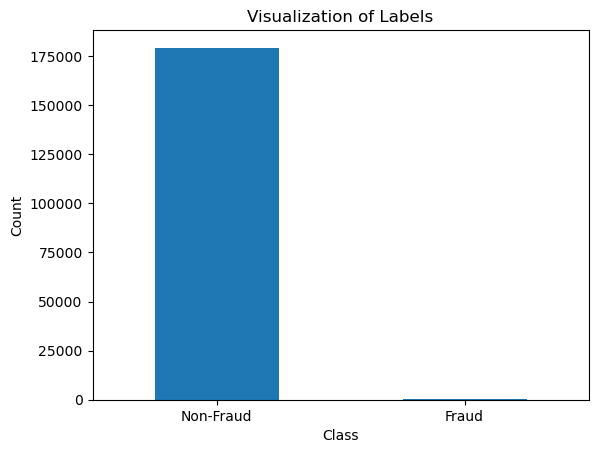

In [8]:
# Visualize the "Labels" column in our dataset

labels = ["Non-Fraud", "Fraud"]
count_classes = transaction_fraud_data.value_counts(transaction_fraud_data['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

### Step 2: Exploratory Data Analysis (EDA) and Preprocessing

In [9]:
transaction_fraud_data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

### Step 4: Feature Selection and Engineering

In [15]:
y = transaction_fraud_data['Class']

X = transaction_fraud_data.drop(columns=['Class'], axis=1)
                    
display(y)

0         0
1         0
2         0
3         0
4         0
         ..
195177    0
195178    0
195179    0
195180    0
195181    0
Name: Class, Length: 195182, dtype: int64

In [16]:
display(X)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,0.09,-0.55,-0.62,-0.99,-0.31,1.47,-0.47,0.21,0.03,0.40,0.25,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,-0.17,1.61,1.07,0.49,-0.14,0.64,0.46,-0.11,-0.18,-0.15,-0.07,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,0.21,0.62,0.07,0.72,-0.17,2.35,-2.89,1.11,-0.12,-2.26,0.52,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,-0.05,-0.23,0.18,0.51,-0.29,-0.63,-1.06,-0.68,1.97,-1.23,-0.21,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,0.75,-0.82,0.54,1.35,-1.12,0.18,-0.45,-0.24,-0.04,0.80,0.41,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195177,130932.00,2.03,-0.07,-1.13,0.48,-0.07,-1.10,0.15,-0.35,0.38,0.16,-0.62,0.44,0.58,0.29,0.69,0.07,-0.55,-0.36,-0.37,-0.16,0.16,0.56,0.09,-0.03,-0.01,0.39,-0.06,-0.06,19.70
195178,130933.00,-0.73,1.39,-0.30,-0.57,0.78,-0.37,1.18,-0.55,-0.10,0.15,1.36,-0.13,-0.49,-1.19,0.15,0.38,0.20,1.02,0.18,-0.10,0.30,0.72,-0.37,0.72,-0.01,0.58,-1.11,-0.21,45.61
195179,130933.00,1.76,-1.00,-1.88,-0.49,1.66,3.84,-1.05,0.99,0.86,0.06,-0.06,0.28,0.07,0.15,1.28,0.46,-0.76,0.02,-0.63,0.12,0.26,0.51,0.12,0.75,-0.29,0.36,-0.02,-0.03,124.00
195180,130933.00,-1.64,0.29,-0.49,-0.38,0.02,-0.63,1.55,0.27,-0.24,-2.09,-0.32,0.45,0.51,-1.48,-0.53,0.01,1.39,0.13,-0.31,0.76,0.04,-0.38,0.54,0.94,0.25,-0.14,0.14,0.12,297.74


In [17]:
train_test_sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in train_test_sss.split(X, y):
    train_df = transaction_fraud_data.loc[train_index]
    test_df = transaction_fraud_data.loc[test_index]

In [18]:
X_train_df = train_df.drop(['Class'], axis=1)
y_train_df = train_df['Class']

In [19]:
train_val_sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, val_index in train_val_sss.split(X_train_df, y_train_df):
    train_df = transaction_fraud_data.loc[train_index]
    val_df = transaction_fraud_data.loc[val_index]

In [20]:
train_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
89352,62537.00,-3.68,1.85,-0.07,-0.53,3.36,-2.92,-7.33,-6.26,0.93,0.56,-1.18,0.95,-1.74,1.39,-0.54,0.05,0.60,-0.88,-0.90,0.82,-1.04,-0.65,-6.88,0.76,-2.30,0.60,0.41,0.16,2.00,0
16344,27731.00,1.10,-0.04,0.49,0.56,-0.44,-0.29,-0.16,0.10,-0.07,0.08,1.67,0.71,-0.68,0.62,0.61,0.12,-0.26,-0.26,-0.35,-0.11,0.04,0.03,0.03,0.25,0.23,0.30,-0.03,0.01,33.49,0
122010,76401.00,-1.53,0.28,-0.21,-0.73,1.40,3.85,-1.23,1.94,-0.02,-0.95,-1.00,0.28,0.08,0.26,0.08,0.63,-0.35,0.48,0.51,-0.16,0.07,-0.07,0.21,1.04,-0.36,0.22,-0.13,-0.15,17.07,0
89917,62786.00,-1.35,-0.73,0.93,-1.44,-0.16,-1.16,-0.62,0.54,-1.17,-0.21,-0.74,-1.41,-1.47,0.44,0.44,1.17,0.53,-1.46,-0.43,0.11,0.42,0.52,0.02,0.05,-0.36,-0.40,0.01,-0.07,35.00,0
79107,57869.00,0.98,-0.55,0.01,0.15,0.16,1.33,-0.33,0.45,-1.48,0.75,2.09,0.89,-0.23,0.77,1.06,-2.56,0.88,-0.73,-2.14,-0.54,-0.54,-1.19,0.28,-1.12,-0.09,-0.64,0.08,0.02,84.29,0


In [21]:
train_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124916 entries, 89352 to 28195
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    124916 non-null  float64
 1   V1      124916 non-null  float64
 2   V2      124916 non-null  float64
 3   V3      124916 non-null  float64
 4   V4      124916 non-null  float64
 5   V5      124916 non-null  float64
 6   V6      124916 non-null  float64
 7   V7      124916 non-null  float64
 8   V8      124916 non-null  float64
 9   V9      124916 non-null  float64
 10  V10     124916 non-null  float64
 11  V11     124916 non-null  float64
 12  V12     124916 non-null  float64
 13  V13     124916 non-null  float64
 14  V14     124916 non-null  float64
 15  V15     124916 non-null  float64
 16  V16     124916 non-null  float64
 17  V17     124916 non-null  float64
 18  V18     124916 non-null  float64
 19  V19     124916 non-null  float64
 20  V20     124916 non-null  float64
 21  V21    

In [23]:
transaction_fraud_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,195182.00,69127.06,33663.41,0.00,43788.00,66285.50,87657.25,130935.00
V1,195182.00,-0.11,1.89,-56.41,-0.96,-0.10,1.21,2.45
V2,195182.00,0.01,1.62,-72.72,-0.58,0.08,0.78,22.06
V3,195182.00,0.34,1.44,-33.68,-0.30,0.51,1.23,9.38
V4,195182.00,0.08,1.40,-5.68,-0.79,0.08,0.90,16.88
V5,195182.00,-0.12,1.36,-42.15,-0.79,-0.18,0.45,34.80
V6,195182.00,0.05,1.31,-26.16,-0.71,-0.22,0.45,22.53
V7,195182.00,-0.06,1.21,-43.56,-0.58,-0.01,0.49,36.68
V8,195182.00,0.02,1.21,-73.22,-0.18,0.04,0.34,20.01
V9,195182.00,0.01,1.14,-13.43,-0.66,-0.07,0.63,15.59


As stated from the dataset author, the feature in the dataset is obtained from PCA. The only features that not obtained from PCA are 'Amount' and 'Time'. Standard scaler is required to apply on these two features. It is to avoid the model to have a false sense of feature 'Amount' and 'Time' is more significant than the rest of features when model being trained.

In [24]:
label_weight_perc = train_df['Class'].value_counts(normalize=True) * 100

label_weight_perc

0   99.78
1    0.22
Name: Class, dtype: float64

In [25]:
train_df.corr()['Class'].sort_values()

V17      -0.42
V14      -0.35
V3       -0.30
V12      -0.29
V10      -0.29
V7       -0.27
V16      -0.26
V18      -0.16
V1       -0.15
V5       -0.15
V9       -0.12
V6       -0.05
V15      -0.01
V13      -0.01
V24      -0.01
V25      -0.01
V23      -0.00
V26       0.00
Time      0.00
V28       0.00
Amount    0.01
V22       0.01
V27       0.01
V8        0.01
V20       0.02
V21       0.04
V19       0.05
V2        0.13
V4        0.16
V11       0.18
Class     1.00
Name: Class, dtype: float64

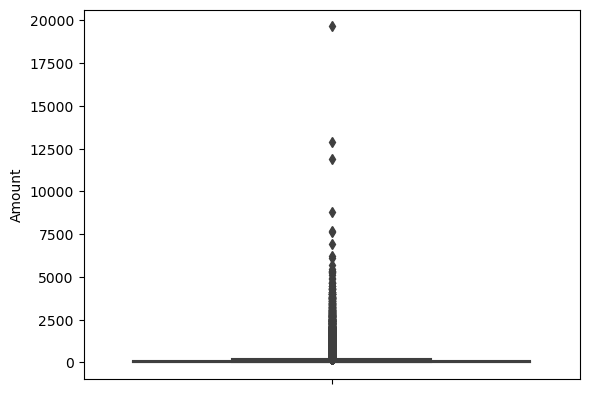

In [26]:
sns.boxplot(data=train_df, y='Amount')

plt.show()

In [28]:
feature_outlier = dict()

class Outlier:
    def __init__(self, q1, q3):
        self.q1 = q1
        self.q3 = q3
        self.iqr = q3 - q1
    
    def get_outlier_boundary(self):
        lower_fence = self.q1 - 1.5 * self.iqr
        upper_fence = self.q3 + 1.5 * self.iqr
        
        return lower_fence, upper_fence


def filter_outlier(df, cols=[]):
    if 'is_outlier' not in df.columns:
        df['is_outlier'] = (False) * len(df)
        
    for col in cols:
        if col in feature_outlier.keys():
            outlier = feature_outlier[col]
        else:
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            
            outlier = Outlier(q1, q3)
            feature_outlier[col] = outlier
             
        lower_fence, upper_fence = outlier.get_outlier_boundary()
        
        outlier = (df[col] < lower_fence) | (df[col] > upper_fence)
        
        df['is_outlier'] = outlier | df['is_outlier']
        
    df = df[~df['is_outlier']]
    df = df.drop(['is_outlier'], axis=1)
             
    return df

In [29]:
train_df = filter_outlier(train_df, cols=['Amount'])

In [30]:
# Apply standardisation to the feature 'city_pop'
std_feat = ['Amount', 'Time']
std_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

In [31]:
full_pipeline = ColumnTransformer([
    ('std_feat', std_pipeline, std_feat)
], remainder='passthrough')

In [32]:
X_train = train_df.drop(['Class'], axis=1)
y_train = train_df['Class']

X_train = full_pipeline.fit_transform(X_train)

In [33]:
X_val = val_df.drop(['Class'], axis=1)
y_val = val_df['Class']

X_val = full_pipeline.transform(X_val)

In [34]:
X_test = test_df.drop(['Class'], axis=1)
y_test = test_df['Class']

X_test = full_pipeline.transform(X_test)

In [35]:
# Model Evaluation Metrics
model_eval = {
    'model': [],
    'recall': [],
    'f1_score': []
}

def add_model_eval(model, recall, f1_score):
    model_eval['model'].append(model)
    model_eval['recall'].append(f'{recall: .2f}')
    model_eval['f1_score'].append(f'{f1_score: .2f}')
    
def view_models_eval(sort=False):
    eval_df = pd.DataFrame(model_eval)
    
    if sort:
        eval_df = eval_df.sort_values(by=['recall', 'f1_score'], ascending=[False, False])
    
    display(eval_df.style.hide_index())


In [36]:
# Benchmark Model - Logistic Regression
log_reg = LogisticRegression(random_state=42, verbose=1)
log_reg.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           31     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.70128D+04    |proj g|=  5.53270D+04

At iterate   50    f=  4.43255D+02    |proj g|=  1.44281D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   31     97    113      1     0     0   3.128D-02   4.431D+02
  F =   443.13853487861684     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished


LogisticRegression(random_state=42, verbose=1)

In [37]:
y_pred = log_reg.predict(X_val)

add_model_eval('logistic regression', recall_score(y_val, y_pred), f1_score(y_val, y_pred))

In [38]:
view_models_eval()

model,recall,f1_score
logistic regression,0.56,0.68


In [39]:
# Stochastic Gradient Descent (SGD) Classifier
sgd_clf = SGDClassifier(random_state=42, verbose=1)
sgd_clf.fit(X_train, y_train)

-- Epoch 1
Norm: 19.67, NNZs: 30, Bias: -231.877763, T: 111106, Avg. loss: 0.360798
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 21.02, NNZs: 30, Bias: -227.313997, T: 222212, Avg. loss: 0.123056
Total training time: 0.04 seconds.
-- Epoch 3
Norm: 23.84, NNZs: 30, Bias: -224.505351, T: 333318, Avg. loss: 0.109703
Total training time: 0.05 seconds.
-- Epoch 4
Norm: 21.92, NNZs: 30, Bias: -222.791100, T: 444424, Avg. loss: 0.107929
Total training time: 0.07 seconds.
-- Epoch 5
Norm: 21.94, NNZs: 30, Bias: -221.306461, T: 555530, Avg. loss: 0.107776
Total training time: 0.08 seconds.
-- Epoch 6
Norm: 21.73, NNZs: 30, Bias: -220.124233, T: 666636, Avg. loss: 0.103749
Total training time: 0.09 seconds.
-- Epoch 7
Norm: 21.36, NNZs: 30, Bias: -219.137358, T: 777742, Avg. loss: 0.104543
Total training time: 0.10 seconds.
-- Epoch 8
Norm: 21.76, NNZs: 30, Bias: -218.213245, T: 888848, Avg. loss: 0.103922
Total training time: 0.12 seconds.
-- Epoch 9
Norm: 21.70, NNZs: 30, Bias: -217.438

SGDClassifier(random_state=42, verbose=1)

In [40]:
y_pred = sgd_clf.predict(X_val)

add_model_eval('sgd classifier', recall_score(y_val, y_pred), f1_score(y_val, y_pred))

In [41]:
view_models_eval()

model,recall,f1_score
logistic regression,0.56,0.68
sgd classifier,0.53,0.66


In [42]:
# Random Forest Classifier
forest_clf = RandomForestClassifier(random_state=42, verbose=2)
forest_clf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   42.8s finished


RandomForestClassifier(random_state=42, verbose=2)

In [43]:
y_pred = forest_clf.predict(X_val)

add_model_eval('random forest classifier', recall_score(y_val, y_pred), f1_score(y_val, y_pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


In [44]:
view_models_eval()

model,recall,f1_score
logistic regression,0.56,0.68
sgd classifier,0.53,0.66
random forest classifier,0.84,0.90


In [45]:
svm_clf = SVC(random_state=42, verbose=2)
svm_clf.fit(X_train, y_train)

[LibSVM].
*..*
optimization finished, #iter = 3274
obj = -186.407044, rho = -0.664919
nSV = 1508, nBSV = 119
Total nSV = 1508


SVC(random_state=42, verbose=2)

In [46]:
y_pred = svm_clf.predict(X_val)

add_model_eval('support vector machine classifier', recall_score(y_val, y_pred), f1_score(y_val, y_pred))

In [47]:
view_models_eval()

model,recall,f1_score
logistic regression,0.56,0.68
sgd classifier,0.53,0.66
random forest classifier,0.84,0.90
support vector machine classifier,0.67,0.80


In [48]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [49]:
y_pred = svm_clf.predict(X_val)

add_model_eval('naive bayes', recall_score(y_val, y_pred), f1_score(y_val, y_pred))

In [50]:
view_models_eval()

model,recall,f1_score
logistic regression,0.56,0.68
sgd classifier,0.53,0.66
random forest classifier,0.84,0.90
support vector machine classifier,0.67,0.80
naive bayes,0.67,0.80


In [51]:
view_models_eval(sort=True)

model,recall,f1_score
random forest classifier,0.84,0.90
support vector machine classifier,0.67,0.80
naive bayes,0.67,0.80
logistic regression,0.56,0.68
sgd classifier,0.53,0.66


In [53]:
# Fine Tune best performing model
# clf = classifier
# ft = fine-tune
forest_clf_ft = RandomForestClassifier(random_state=42)

param_grid = {
    'bootstrap': [True, False],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [100, 200, 300, 400, 500]
}

random_search = RandomizedSearchCV(forest_clf_ft, 
                                   param_grid, 
                                   random_state=42,
                                   cv=2,
                                   n_iter=10, 
                                   scoring='recall',
                                   verbose=2)

random_search.fit(X_train, y_train)


Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time= 1.5min
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time= 1.3min
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=  54.0s
[CV] END bootstrap=True, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=  44.5s
[CV] END bootstrap=False, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time= 2.2min
[CV] END bootstrap=False, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time= 1.8min
[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time= 1.2min
[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=4, min_samples_split

RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'bootstrap': [True, False],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, scoring='recall', verbose=2)

In [55]:
forest_clf_best_params = random_search.best_params_

forest_clf_best_params

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'bootstrap': False}

In [56]:
y_pred = random_search.predict(X_val)

add_model_eval('random forest classifier with fine-tune', recall_score(y_val, y_pred), f1_score(y_val, y_pred))

In [57]:
view_models_eval()

model,recall,f1_score
logistic regression,0.56,0.68
sgd classifier,0.53,0.66
random forest classifier,0.84,0.90
support vector machine classifier,0.67,0.80
naive bayes,0.67,0.80
random forest classifier with fine-tune,0.85,0.91
